# Week4授業前課題2
## 住宅価格の予測
Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

# 【問題1】
## 練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [3]:
import numpy as np
import pandas as pd

filename = 'train.csv'
df_prices = pd.read_csv(filename)

df_features = df_prices[['GrLivArea', 'YearBuilt']]

display(df_features)
df_features.info()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


# 【問題2】
## 線形回帰による推定と評価
データを簡単に分析、前処理し、 **線形回帰** による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

評価のための指標値は回帰問題では **平均二乗誤差（Mean Squared Error, MSE）** を使うことが一般的です。

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

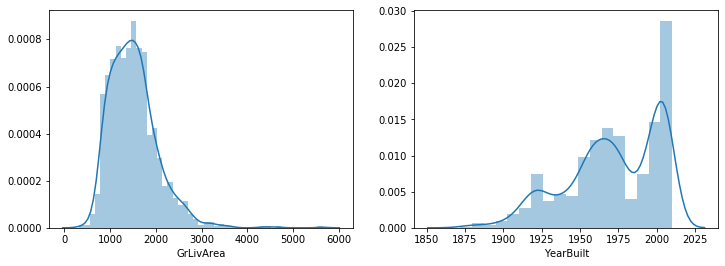

In [6]:
# 特徴量の前処理
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)
ax1 = sns.distplot(df_features['GrLivArea'])

ax2 = fig.add_subplot(122)
ax2 = sns.distplot(df_features['YearBuilt'])

plt.show()

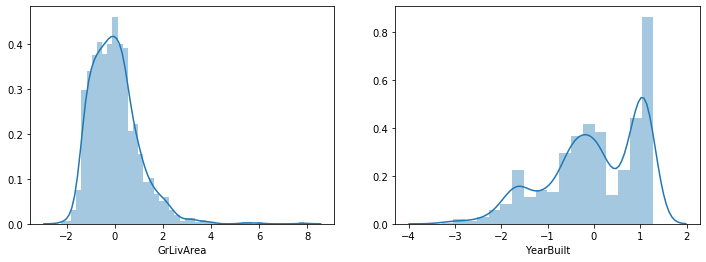

average: [-1.27751691e-16  1.04634718e-15]
variance: [1. 1.]


In [18]:
# 標準化を行う
from sklearn.preprocessing import StandardScaler

array_features = df_features.values

scaler = StandardScaler()

scaler.fit(array_features)
array_features_std = scaler.transform(array_features)

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)
ax1 = sns.distplot(array_features_std[:, 0])
ax1.set_xlabel('GrLivArea')

ax2 = fig.add_subplot(122)
ax2 = sns.distplot(array_features_std[:, 1])
ax2.set_xlabel('YearBuilt')

plt.show()

# 平均と分散を確認する
print(f'average: {np.average(array_features_std, axis=0)}')
print(f'variance: {np.var(array_features_std, axis=0)}')

In [25]:
# 線形回帰を行う
from sklearn.linear_model import LinearRegression

y = df_prices['SalePrice'].values

reg = LinearRegression()
reg.fit(array_features_std, y)
reg.score(array_features_std, y)

# GrLivArea
#gr_liv_area_std = array_features_std[:, 0]
#reg_gr_liv_area = LinearRegression()
#reg_gr_liv_area.fit(gr_liv_area_std, y)
#reg_gr_liv_area.score(gr_liv_area_std, y)

# YearBuilt
#year_built_std = array_features_std[:, 1]
#reg_year_built = LinearRegression()
#reg_year_built.fit(year_built_std, y)
#reg_year_built.score(year_built_std, y)



0.6539902028290657

# 【問題3】
## 手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。